# Introduction
Every year, thousands of scientific papers are peer reviewed and published in verified academic journals focused on a wide range of different industries. For a single journal, the compilation of small findings in accepted manuscripts come together to help make significant breakthroughs in cutting-edge industries. For an individual highly experienced in a specific field, sifting through these papers to summarize a recently released volume may not be very time consuming. For outsiders, however, this is much more challenging to accomplish. 

The below notebook demonstrates how a user can automate the process of analyzing an entire journal of academic papers. **utils.py** contains multiple functions that can scrape journals from the web and perform different analyses on what an industry is focusing on and where the industry is trending towards in the future. Currently, the journals of interest are limited to the availability in *ScienceDirect* but can easily be extended to other websites that house academic journals. 

# Walk-through
Here is a step-by-step walkthrough for performing an automated journal trend analysis using these functions. First, import some libraries for plotting results, creating Numpy arrays, and supressing some warning messages.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Next, decide what journal is of interest. For this example, *Composites Part B: Engineering* is used. 

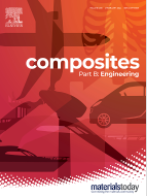

To select a journal, navigate to www.sciencedirect.com and search for a journal. Once at the journal main page, copy the end of the URL and create the journal variable. For example, www.sciencedirect.com/journal/composites-part-b-engineering will use the variable below. Also note the start and end volume you'd like to perform analysis on.

In [2]:
journal = 'composites-part-b-engineering'
max_vol = 195
min_vol = 150
num_vols = max_vol-min_vol

Import the "scrape" function from **utils.py**. The scraped data will be stored in the "data" folder. This may take some time depending on the number of volumes being observed. Make sure there is a "data" folder for the scraped data to be stored.

In [3]:
from utils import scrape
scrape(journal, min_vol, max_vol)

{'CiteScore': '11.1', 'ImpactFactor': '7.635', '5-year Impact Factor': '1.925'}

After the web scrape is performed, the function will output some metrics of the journal, including *Impact Factor* and *Cite Score*. The scraped journal titles can be seen in the data folder in a CSV format.

The scraping is the most time intensive portion of the overall process. Since it is saved locally, data wrangling and analysis can be performed. The purpose of this study is to focus on key words that are used in this journal and with what other words they are commonly used with. To do this, the data needs to parse the words out of the scaped titles and removed filler words. This is what "clean_data" does. 

In [6]:
from utils import clean_data
data = clean_data(journal)
data[1]

{'Enhanced',
 'Sustainable',
 'acoustic',
 'ash',
 'corn',
 'epoxy',
 'insulation',
 'nanocomposites',
 'performance',
 'silica',
 'stalk',
 'synthesized',
 'thermal',
 'xerogel'}

Notice the titles is reduced to a set of significant words for this title.

As a first bit of visualization, a wordcloud can be created using the function "wordcloud."

(-0.5, 399.5, 199.5, -0.5)

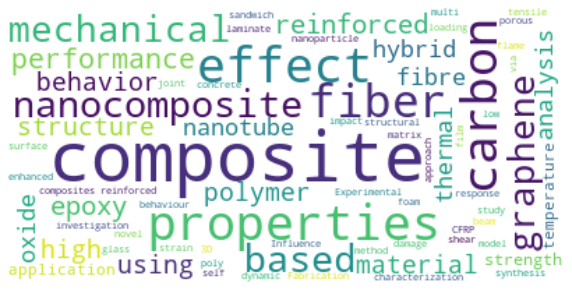

In [7]:
from utils import wordcloud
wc = wordcloud(data, 70, 50, 5, "white")

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

For someone not familiar with the composites industry, you can now get an idea what are popular sub-areas of interest. Obviously *composite* is a commonly used term, but one can now see that *nanocomposites* and *graphene* are substantial topics in this industry. To quantify the frequency in which terms are used in totality, "word_freq" creates a dictionary that logs the count of each term used.

In [9]:
from utils import word_freq
wf = word_freq(data)

Below is a bar graph that shows the top 20 used terms in descending order.

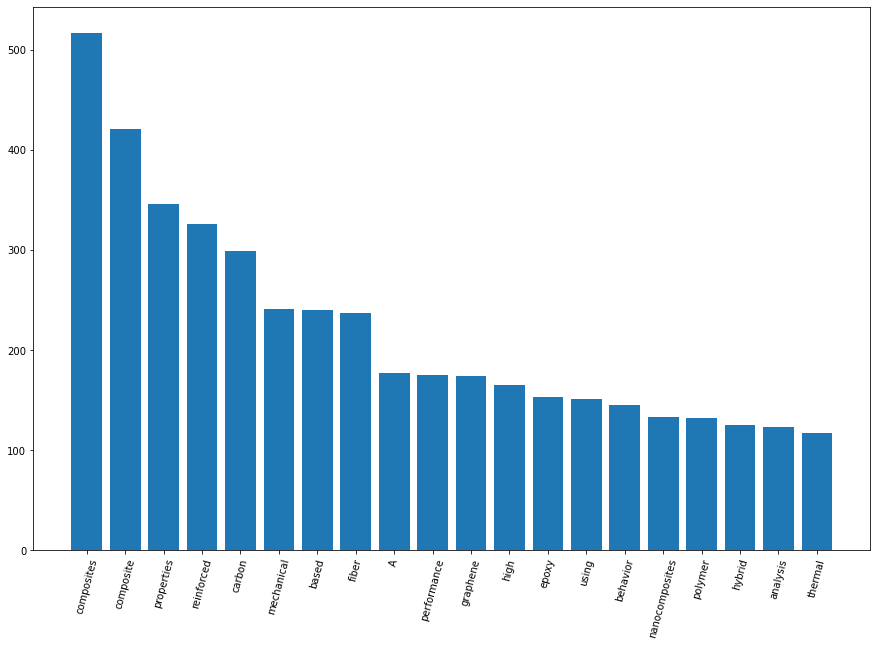

In [10]:
keys = list(wf.keys())[0:20]
values = [wf[i] for i in keys]
plt.figure(figsize=[15,10])
plt.bar(keys, values)
plt.xticks(rotation=75)
plt.show()

Retrieving the most commonly used words in a journal during a period of time provides a summary of the industry. However, what would be interesting is to observe if certain terms are trending upwards or downwards. "word_trends" takes the X most frequently used words (num_words) and returns the word frequency over time. "factor" changes the number of intervals.

In [18]:
from utils import word_trends

num_words = 10
factor = 5
section_freq = word_trends(data, num_vols, num_words, factor)
section_freq

{'concrete': [0, 0, 20, 0, 0, 0, 0, 0, 0],
 'carbon': [28, 35, 44, 34, 36, 36, 26, 33, 25],
 'high': [0, 0, 0, 0, 0, 0, 0, 24, 25],
 'performance': [0, 0, 0, 0, 21, 0, 27, 27, 25],
 'thermal': [0, 0, 0, 28, 0, 0, 0, 0, 0],
 'mechanical': [25, 23, 34, 38, 0, 28, 25, 0, 25],
 'based': [30, 27, 27, 22, 25, 26, 22, 28, 28],
 'A': [18, 24, 0, 23, 0, 0, 0, 29, 0],
 'graphene': [0, 0, 24, 0, 25, 0, 0, 24, 0],
 'polymer': [0, 0, 0, 0, 0, 21, 0, 0, 0],
 'properties': [40, 33, 47, 45, 32, 45, 40, 31, 31],
 'hybrid': [0, 0, 0, 0, 0, 0, 22, 0, 0],
 'using': [20, 0, 0, 0, 0, 21, 0, 0, 0],
 'composites': [60, 47, 66, 67, 50, 58, 47, 61, 55],
 'reinforced': [34, 47, 39, 37, 24, 47, 39, 34, 22],
 'fiber': [0, 25, 26, 34, 29, 36, 30, 0, 21],
 'composite': [48, 52, 37, 47, 50, 41, 56, 36, 50],
 'analysis': [22, 24, 0, 0, 0, 0, 0, 0, 0],
 'epoxy': [0, 0, 0, 0, 20, 0, 0, 0, 0]}

Below plots the word trends. Since some nondescriptive words make it through the STOPWORDS filter, there is an option to delete some of the words. 

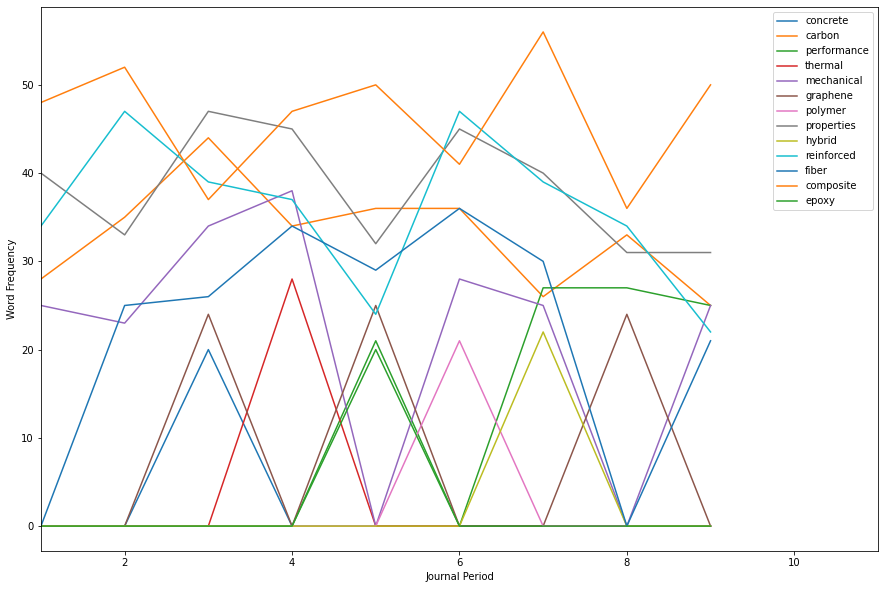

In [12]:
delete_words = ['A','based','analysis','high','using','composites']
for i in delete_words:
    del section_freq[i]

span = len(list(section_freq.values())[0])
x = np.linspace(1,span,span, dtype=int)

plt.figure(figsize=[15,10])
for i in section_freq.keys():
    plt.plot(x,section_freq[i])
plt.xlim(1,11)
plt.xlabel("Journal Period")
plt.ylabel("Word Frequency")
plt.legend(section_freq.keys())
plt.show()

An interesting observation here is that there are a few words that are consistently used over time. Some of the words, instead of trending up or down, have short peaks at specific times. These words could be terms that were popular for only a brief period of time.

Finally, the last function, "word_connections" discovers associativity between commonly used terms in the journal. 

In [22]:
from utils import word_connections

words = ['polymer', 'graphene', 'carbon', 'fiber']
connections = 7
wc = word_connections(data, words, connections)
for i in words:
    print(i, wc[i])

polymer {'composites': 59.0, 'reinforced': 47.0, 'fiber': 34.0, 'carbon': 32.0, 'properties': 25.0, 'nanocomposites': 20.0}
graphene {'oxide': 81.0, 'composites': 36.0, 'properties': 35.0, 'nanocomposites': 32.0, 'reduced': 31.0, 'carbon': 26.0}
carbon {'composites': 104.0, 'fiber': 92.0, 'reinforced': 91.0, 'nanotubes': 59.0, 'composite': 57.0, 'properties': 54.0}
fiber {'reinforced': 125.0, 'composites': 99.0, 'carbon': 92.0, 'properties': 49.0, 'composite': 43.0, 'mechanical': 37.0}


Given the words chosen, a dictionary is created that lists the top related connections that appear in the same titles in descending order. This data can be further used to create graphs and other visualizations.